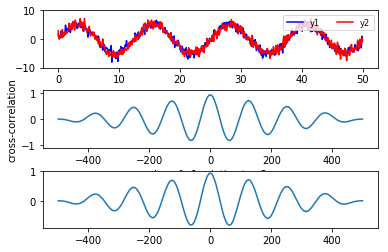

Cross correlate coefficient
Formula calculation : 0.9309097889234588
Using correlate function :  0.9309097889234588
Numpy :  0.9309097889234587
MSE:  1.8768184643423367
RMSE:  1.3699702421375206


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# npts = 500
x = np.linspace(0, 50, 500)

npts = len(x)
y1 = 5 * np.sin(x/2) + np.random.randn(npts)
# y2 = 5 * np.cos(x/2) + np.random.randn(npts)
y2 = 5 * np.sin(x/2) + np.random.randn(npts)

def crocor(x,y):
 npts = len(x)
 lags = np.arange(-npts + 1, npts)
 # Cross covariance
 ccov = np.correlate((y1 - y1.mean()), y2 - y2.mean(), mode='full')
 # Cross correlation coefficient
 ccor = ccov / (y1.std() * y2.std() * npts)
 return (ccor, lags)
 
# ################3
# Cross correlation coefficient by user defined function
# numpy.correlate (Cross correlate) calculates the similarity
# between two vectors/signals as a function of lag
# Seems it's wrong
pcc = np.correlate( (y1-y1.mean())/np.std(y1)/len(y1) , (y2-y2.mean())/np.std(y2) , mode='full')

# Plot
ccor, lags = crocor(y1,y2)
fig, axs = plt.subplots(nrows=3)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)

ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

ax = axs[2]
ax.plot(lags,pcc)

maxlag = lags[np.argmax(ccor)]
# print("max correlation is at lag %d" % maxlag)
# print(np.argmax(ccor))
plt.show()


# ############################
# Cross correlation coefficient according to the formula
# In signal processing ,
# numpy.correlate (Cross correlate) calculates the similarity between two vectors/signals
# as a function of lag
aa = np.cov(y1,y2, bias=True) # Without the option 'bias=True', numpy.cov calculates the sample covariance
print('Cross correlate coefficient')
print('Formula calculation :', (aa[0][1]/(y1.std() * y2.std()) ))
print('Using correlate function : ', np.max(ccor))
print('Numpy : ', np.max(pcc))

# #######################
# Mean Square Error
mse = ((y1-y2)**2).sum() / len(y1)
# Root Mean Square Error
rmse = math.sqrt(mse)
print('MSE: ', mse)
# RMSE by numpy
print('RMSE: ' , np.sqrt(np.mean((y1-y2)**2)) )

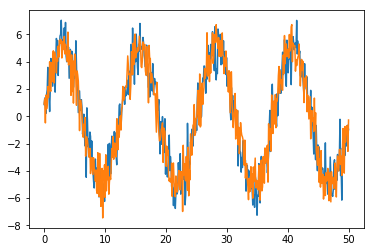

In [9]:
plt.plot(x,y1,x,y2)